In [ ]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)



In [ ]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [ ]:
# Training function
def train_model(optimizer_name, optimizer, epochs=100):
    model = SimpleNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer(model.parameters())

    train_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    return model, train_losses



In [ ]:
# Plotting function
def plot_losses(losses_dict):
    plt.figure(figsize=(12, 6))
    for name, losses in losses_dict.items():
        plt.plot(losses, label=name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss Comparison')
    plt.show()



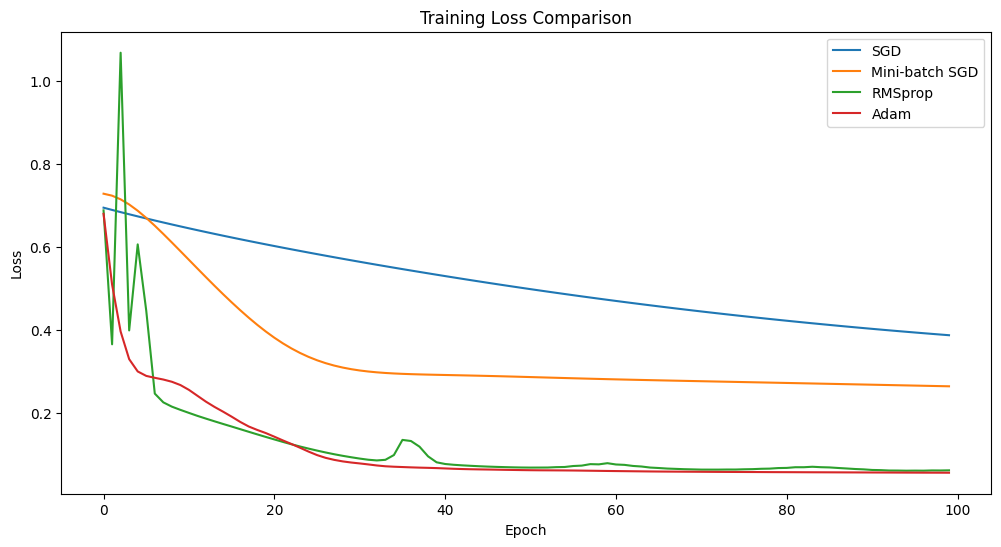

SGD Accuracy: 0.84
Mini-batch SGD Accuracy: 0.88
RMSprop Accuracy: 0.98
Adam Accuracy: 0.99


In [ ]:
# Comparison of different optimizers
optimizers = {
    'SGD': lambda params: optim.SGD(params, lr=0.01),
    'Mini-batch SGD': lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    'RMSprop': lambda params: optim.RMSprop(params, lr=0.01),
    'Adam': lambda params: optim.Adam(params, lr=0.01)
}

# Train models with different optimizers
losses_dict = {}
for name, opt in optimizers.items():
    _, losses = train_model(name, opt)
    losses_dict[name] = losses

# Plot training losses
plot_losses(losses_dict)

# Evaluation function
def evaluate_model(model):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).sum().item() / len(y_test)
    return accuracy

# Evaluate models
for name, opt in optimizers.items():
    model, _ = train_model(name, opt)
    accuracy = evaluate_model(model)
    print(f'{name} Accuracy: {accuracy:.2f}')

